In [121]:
import pandas as pd
import re
import numpy as np


df = pd.read_csv("listings2.csv", index_col = 0)

In [62]:
df.columns

Index(['listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar

In [63]:
to_drop = ['listing_url', 
           'scrape_id', 
           'last_scraped', 
           'source', 
           'host_id', 
           'host_url',
           'host_name',
           'host_thumbnail_url',
           'host_picture_url',
           'neighbourhood_group_cleansed',
           'bathrooms',
           'minimum_minimum_nights',
           'maximum_minimum_nights', 
           'minimum_maximum_nights',
           'maximum_maximum_nights',
           'minimum_nights_avg_ntm',
           'maximum_nights_avg_ntm',
           'calendar_updated',
           'host_neighbourhood',
           'neighbourhood',
           'license']
df = df.drop(to_drop, axis = 1)

In [64]:
df.columns

Index(['name', 'description', 'neighborhood_overview', 'picture_url',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds',
       'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'calendar_last_scraped',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_locati

In [65]:
# df['description']= df['description'].str.replace('<br />','')
# df['description']= df['description'].str.replace('<b>','')
# df['description']= df['description'].str.replace('</b>','')

df['description']= df['description'].str.replace(r'<[^<>]*>', '', regex=True)


df['description'].iloc[0]

'Quiet Garden View Room & Super Fast WiFiThe spaceI\'m renting a bedroom (room overlooking the garden) in my apartment in Amsterdam, The room is located to the east of the city centre in a quiet, typical Amsterdam neighbourhood the "Indische Buurt". Amsterdam’s historic centre is less than 15 minutes away by bike or tram.The features of the room are:- Twin beds (80 x 200 cm, down quilts and pillows) - 2 pure cotton towels for each guest - reading lamps- bedside table- wardrobe- table with chairs- tea and coffee making facilities- mini bar- alarm clock- Hi-Fi system with cd player, connection for mp3 player / phone- map of Amsterdam and public transport- Wi-Fi Internet connection Extra services:- Bike rentalLicense number0363 5F3A 5684 6750 D14D'

In [66]:
df['host_since'] = pd.to_datetime(df['host_since'])

In [67]:
df['host_since']

id
2818       2008-09-24
20168      2009-12-02
27886      2010-03-23
28871      2010-05-13
29051      2010-05-13
              ...    
12690380   2014-05-03
15005354   2015-10-13
15171981   2016-09-22
17567812   2016-01-18
20084434   2015-03-16
Name: host_since, Length: 6893, dtype: datetime64[ns]

In [68]:
df['host_about']= df['host_about'].str.replace('\r\n','')
df['host_about']= df['host_about'].str.replace(r'<[^<>]*>', '', regex=True)

In [69]:
df['host_about'].iloc[9]

'Hi there! Thank you for visiting my listing. I love my home and am happy to welcome guests.I am 48 years old and I live here with my partner Jan.  I  work in private health care, specialized with dementia. I started out as a home exchanger, so I know how great it feels to have a home away form home when you visit a big city. After a long day full of walking and sight seeing it is wonderful to get home and lay on a sofa or take a bath and get a fresh soda from your own fridge without a mini bar bill!If you have any questions please do not hesitate to contact me. If you like my house, please do not make a reservation request immediately, just send me a message. I never accept reservation requests without communicating with potential guests through email before. It is not a second home, but the house I live in. I do not rent it out to everybody. Thanks!Best wishes, Cornélie'

In [70]:
df['host_verifications'] = df['host_verifications'].apply(lambda x: x.strip('][').split(', '))


In [71]:
df['host_verifications'].iloc[1]

["'email'", "'phone'"]

In [72]:
df['num_verifications'] = df['host_verifications'].apply(lambda x:len(x))

In [73]:
df['num_verifications']

id
2818        2
20168       2
27886       2
28871       2
29051       2
           ..
12690380    2
15005354    2
15171981    2
17567812    2
20084434    2
Name: num_verifications, Length: 6893, dtype: int64

In [74]:
df['amenities'] = df['amenities'].apply(lambda x: x.strip('][').split(', '))
df['num_amenities'] = df['amenities'].apply(lambda x:len(x))

In [75]:
df['num_amenities']

id
2818        40
20168       16
27886       45
28871       20
29051       19
            ..
12690380    66
15005354    32
15171981    45
17567812    29
20084434    61
Name: num_amenities, Length: 6893, dtype: int64

In [76]:
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

In [77]:
df['min_price'] = df['price'] * df['minimum_nights']
df['max_price'] = df['price'] * df['maximum_nights']

In [78]:
df['min_price']

id
2818         147.0
20168        106.0
27886        272.0
28871        150.0
29051        110.0
             ...  
12690380     900.0
15005354     780.0
15171981     449.0
17567812    1128.0
20084434     600.0
Name: min_price, Length: 6893, dtype: float64

In [79]:
df['max_price']

id
2818          1372.0
20168        38690.0
27886        48416.0
28871       136875.0
29051        40150.0
              ...   
12690380    337500.0
15005354      4095.0
15171981     13470.0
17567812    317250.0
20084434    225000.0
Name: max_price, Length: 6893, dtype: float64

In [80]:
df['calendar_last_scraped'] = pd.to_datetime(df['calendar_last_scraped'])

In [81]:
df['calendar_last_scraped']

id
2818       2022-09-07
20168      2022-09-07
27886      2022-09-07
28871      2022-09-07
29051      2022-09-07
              ...    
12690380   2022-09-07
15005354   2022-09-07
15171981   2022-09-07
17567812   2022-09-07
20084434   2022-09-07
Name: calendar_last_scraped, Length: 6893, dtype: datetime64[ns]

In [82]:
df['first_review'] = pd.to_datetime(df['first_review'])
df['last_review'] = pd.to_datetime(df['last_review'])

In [83]:
df['host_is_superhost'] = df['host_is_superhost'].apply(lambda x: True if (x == "t") else False)
        

In [84]:
df['host_is_superhost']

id
2818         True
20168       False
27886       False
28871        True
29051        True
            ...  
12690380    False
15005354    False
15171981    False
17567812    False
20084434    False
Name: host_is_superhost, Length: 6893, dtype: bool

In [85]:

df['host_has_profile_pic'] = df['host_has_profile_pic'].apply(lambda x: True if (x == "t") else False)



In [86]:
df['host_identity_verified'] = df['host_identity_verified'].apply(lambda x: True if (x == "t") else False)

In [87]:
df['host_identity_verified']

id
2818         True
20168        True
27886        True
28871        True
29051        True
            ...  
12690380     True
15005354    False
15171981    False
17567812    False
20084434    False
Name: host_identity_verified, Length: 6893, dtype: bool

In [88]:
df.replace("N/A", None)

/Users/kevinyan/opt/miniconda3/envs/cse217a/lib/python3.7/site-packages/pandas/core/missing.py:56: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= arr == x


,name,description,neighborhood_overview,picture_url,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,...,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,num_verifications,num_amenities,min_price,max_price
id,,,,,,,,,,,,,,,,,,,,,
2818,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFiThe sp...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,2008-09-24,"Amsterdam, Netherlands","Upon arriving in Amsterdam, one can imagine as...",within an hour,100%,100%,...,t,1,0,1,0,1.86,2,40,147.0,1372.0
20168,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,2009-12-02,"Amsterdam, Netherlands",+ (Phone number hidden by Airbnb),within an hour,100%,98%,...,t,2,0,2,0,2.22,2,16,106.0,38690.0
27886,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,2010-03-23,"Amsterdam, Netherlands","Marjan works in ""eye"" the dutch filmmuseum, an...",within an hour,100%,100%,...,t,1,0,1,0,1.78,2,45,272.0,48416.0
28871,Comfortable double room,The spaceIn a monumental house right in the ce...,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,2010-05-13,"Amsterdam, Netherlands",Hi,within an hour,100%,100%,...,f,2,0,2,0,2.92,2,20,150.0,136875.0
29051,Comfortable single room,This room can also accomodate 2 people. For a...,the street is quite lively especially on weeke...,https://a0.muscache.com/pictures/162009/bd6be2...,2010-05-13,"Amsterdam, Netherlands",Hi,within an hour,100%,100%,...,f,2,0,2,0,4.16,2,19,110.0,40150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12690380,"Amsterdam, light big house 15 min from citycenter",We have a comfortable cosy house with a garden...,Green and quiet lots of playgrounds for kids o...,https://a0.muscache.com/pictures/a100d408-769c...,2014-05-03,"Amsterdam, Netherlands",NaN,within a few hours,100%,100%,...,f,1,1,0,0,0.36,2,66,900.0,337500.0
15005354,Perfect family home near Amsterdam,Our house is situated in a quiet neighborhood ...,The house is situated in a beautiful neighbour...,https://a0.muscache.com/pictures/7a7d8058-c3f7...,2015-10-13,NaN,NaN,within an hour,67%,50%,...,f,1,1,0,0,0.26,2,32,780.0,4095.0
15171981,Child friendly house near Amsterdam - free par...,Lovely family house with beautiful garden in a...,"Located just outside of Amsterdam, in Duivendr...",https://a0.muscache.com/pictures/50ab12e8-c478...,2016-09-22,"Duivendrecht, Netherlands",NaN,within an hour,100%,100%,...,f,1,1,0,0,0.29,2,45,449.0,13470.0


In [89]:
df['neighborhood_overview'] = df['neighborhood_overview'].replace(np.nan, '', regex=True)
df['host_about'] = df['host_about'].replace(np.nan, '', regex=True)

In [90]:
for col in df.columns:
    print(col,":", df[col].isna().sum())

name : 0
description : 16
neighborhood_overview : 0
picture_url : 0
host_since : 0
host_location : 771
host_about : 0
host_response_time : 1657
host_response_rate : 1657
host_acceptance_rate : 862
host_is_superhost : 0
host_listings_count : 0
host_total_listings_count : 0
host_verifications : 0
host_has_profile_pic : 0
host_identity_verified : 0
neighbourhood_cleansed : 0
latitude : 0
longitude : 0
property_type : 0
room_type : 0
accommodates : 0
bathrooms_text : 15
bedrooms : 315
beds : 101
amenities : 0
price : 0
minimum_nights : 0
maximum_nights : 0
has_availability : 0
availability_30 : 0
availability_60 : 0
availability_90 : 0
availability_365 : 0
calendar_last_scraped : 0
number_of_reviews : 0
number_of_reviews_ltm : 0
number_of_reviews_l30d : 0
first_review : 646
last_review : 646
review_scores_rating : 646
review_scores_accuracy : 651
review_scores_cleanliness : 651
review_scores_checkin : 651
review_scores_communication : 651
review_scores_location : 651
review_scores_value : 

In [91]:
df.shape

(6893, 57)

In [92]:
df['review_scores_rating'].fillna(value=df['review_scores_rating'].mean(), inplace=True)

In [93]:
df["neighborhood_overview_wordcount"] = df["neighborhood_overview"].apply(lambda x: len(x.split(" ")))

In [94]:
df["neighborhood_overview_wordcount"]

id
2818        158
20168        91
27886         6
28871         6
29051        13
           ... 
12690380     20
15005354     62
15171981     50
17567812     16
20084434    116
Name: neighborhood_overview_wordcount, Length: 6893, dtype: int64

In [95]:
df["host_response_time"].unique()

array(['within an hour', 'within a few hours', nan, 'within a day',
       'a few days or more'], dtype=object)

In [96]:
df = df.replace(
    ['within an hour', 'within a few hours', 'within a day', 'a few days or more'], 
    [0, 1, 2, 3])

In [97]:
df['host_response_time']

id
2818        0.0
20168       0.0
27886       0.0
28871       0.0
29051       0.0
           ... 
12690380    1.0
15005354    0.0
15171981    0.0
17567812    3.0
20084434    2.0
Name: host_response_time, Length: 6893, dtype: float64

In [98]:
df['host_response_time'].mode().values[0]

0.0

In [99]:
#df['host_response_time'].fillna(value=df['host_response_time'].mode(), inplace=True)

In [100]:
df['host_response_time'] = df['host_response_time'].replace(np.nan, df['host_response_time'].mode().values[0], regex=True)

In [101]:
df["host_response_rate"].iloc[0]

'100%'

In [102]:
df['host_response_rate'] = (df['host_response_rate'].replace('[\%,]', '', regex=True).astype(float))/100

In [103]:
df["host_response_rate"].iloc[0]

1.0

In [104]:
df['host_acceptance_rate'] = (df['host_acceptance_rate'].replace('[\%,]', '', regex=True).astype(float))/100

In [105]:
df['host_response_rate'].fillna(value=df['host_response_rate'].mean(), inplace=True)
df['host_acceptance_rate'].fillna(value=df['host_acceptance_rate'].mean(), inplace=True)

In [106]:
df2 = df.dropna()

In [107]:
df2.shape

(5263, 58)

In [108]:
df.shape

(6893, 58)

In [122]:
def clean(df):
    to_drop = ['listing_url',
               'scrape_id',
               'last_scraped',
               'source',
               'host_id',
               'host_url',
               'host_name',
               'host_thumbnail_url',
               'host_picture_url',
               'neighbourhood_group_cleansed',
               'bathrooms',
               'minimum_minimum_nights',
               'maximum_minimum_nights',
               'minimum_maximum_nights',
               'maximum_maximum_nights',
               'minimum_nights_avg_ntm',
               'maximum_nights_avg_ntm',
               'calendar_updated',
               'host_neighbourhood',
               'neighbourhood',
               'license']
    df = df.drop(to_drop, axis = 1) #drop unnecessary/redundant columns
    
    df['description']= df['description'].str.replace(r'<[^<>]*>', '', regex=True) #cleaning
    df['host_about']= df['host_about'].str.replace('\r\n','')             # descriptions from
    df['host_about']= df['host_about'].str.replace(r'<[^<>]*>', '', regex=True) #html tags
    
    to_datetime = ['host_since', 'calendar_last_scraped', 'first_review', 'last_review']
    for col in to_datetime:
        df[col] = pd.to_datetime(df[col])
    
    df['host_verifications'] = df['host_verifications'].apply(lambda x: x.strip('][').split(', '))
    df['num_verifications'] = df['host_verifications'].apply(lambda x:len(x))
    df['amenities'] = df['amenities'].apply(lambda x: x.strip('][').split(', '))
    df['num_amenities'] = df['amenities'].apply(lambda x:len(x))
    
    df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
    df['min_price'] = df['price'] * df['minimum_nights']
    df['max_price'] = df['price'] * df['maximum_nights']
    
    boolean = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified']
    for col in boolean:
            df[col] = df[col].apply(lambda x: True if (x == "t") else False)
    
    df.replace("N/A", None)
    
    NA_to_empty = ['neighborhood_overview', 'host_about', 'description']
    for col in NA_to_empty:
            df[col] = df[col].replace(np.nan, '', regex=True)
    
    imputate_scores = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 
                       'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
                      'review_scores_value', 'reviews_per_month']
    for col in imputate_scores:
        df[col].fillna(value=df[col].mean(), inplace=True)
    
    df["neighborhood_overview_wordcount"] = df["neighborhood_overview"].apply(lambda x: len(x.split(" ")))
    df["host_about_wordcount"] = df["host_about"].apply(lambda x: len(x.split(" ")))
    df["description_wordcount"] = df["description"].apply(lambda x: len(x.split(" ")))

    df = df.replace(
    ['within an hour', 'within a few hours', 'within a day', 'a few days or more'], 
    [0, 1, 2, 3])
    df['host_response_time'] = df['host_response_time'].replace(np.nan, df['host_response_time'].mode().values[0], regex=True)
    
    df['host_response_rate'] = (df['host_response_rate'].replace('[\%,]', '', regex=True).astype(float))/100
    df['host_acceptance_rate'] = (df['host_acceptance_rate'].replace('[\%,]', '', regex=True).astype(float))/100
    df['host_response_rate'].fillna(value=df['host_response_rate'].mean(), inplace=True)
    df['host_acceptance_rate'].fillna(value=df['host_acceptance_rate'].mean(), inplace=True)
    
    df = df.dropna()
    
    return df

In [123]:
print(df.shape)

(6893, 74)


In [124]:
for col in df.columns:
    print(col,":", df[col].isna().sum())

listing_url : 0
scrape_id : 0
last_scraped : 0
source : 0
name : 0
description : 16
neighborhood_overview : 2265
picture_url : 0
host_id : 0
host_url : 0
host_name : 0
host_since : 0
host_location : 771
host_about : 2761
host_response_time : 1657
host_response_rate : 1657
host_acceptance_rate : 862
host_is_superhost : 8
host_thumbnail_url : 0
host_picture_url : 0
host_neighbourhood : 3797
host_listings_count : 0
host_total_listings_count : 0
host_verifications : 0
host_has_profile_pic : 0
host_identity_verified : 0
neighbourhood : 2265
neighbourhood_cleansed : 0
neighbourhood_group_cleansed : 6893
latitude : 0
longitude : 0
property_type : 0
room_type : 0
accommodates : 0
bathrooms : 6893
bathrooms_text : 15
bedrooms : 315
beds : 101
amenities : 0
price : 0
minimum_nights : 0
maximum_nights : 0
minimum_minimum_nights : 2
maximum_minimum_nights : 2
minimum_maximum_nights : 2
maximum_maximum_nights : 2
minimum_nights_avg_ntm : 2
maximum_nights_avg_ntm : 2
calendar_updated : 6893
has_avai

In [125]:
df1 = clean(df)

/Users/kevinyan/opt/miniconda3/envs/cse217a/lib/python3.7/site-packages/pandas/core/missing.py:56: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= arr == x


In [113]:
print(df1.shape)

(5271, 60)


In [114]:
for col in df1.columns:
    print(col,":", df1[col].isna().sum())

name : 0
description : 0
neighborhood_overview : 0
picture_url : 0
host_since : 0
host_location : 0
host_about : 0
host_response_time : 0
host_response_rate : 0
host_acceptance_rate : 0
host_is_superhost : 0
host_listings_count : 0
host_total_listings_count : 0
host_verifications : 0
host_has_profile_pic : 0
host_identity_verified : 0
neighbourhood_cleansed : 0
latitude : 0
longitude : 0
property_type : 0
room_type : 0
accommodates : 0
bathrooms_text : 0
bedrooms : 0
beds : 0
amenities : 0
price : 0
minimum_nights : 0
maximum_nights : 0
has_availability : 0
availability_30 : 0
availability_60 : 0
availability_90 : 0
availability_365 : 0
calendar_last_scraped : 0
number_of_reviews : 0
number_of_reviews_ltm : 0
number_of_reviews_l30d : 0
first_review : 0
last_review : 0
review_scores_rating : 0
review_scores_accuracy : 0
review_scores_cleanliness : 0
review_scores_checkin : 0
review_scores_communication : 0
review_scores_location : 0
review_scores_value : 0
instant_bookable : 0
calculate

In [115]:
import matplotlib.pyplot as plt



Text(0.5, 1.0, 'Neighborhood Overview Wordcount vs. Rating')

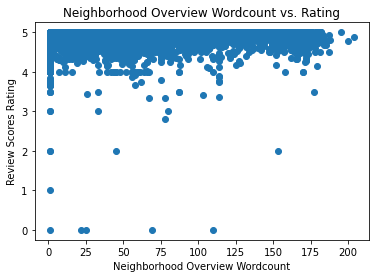

In [116]:
plt.scatter(df1["neighborhood_overview_wordcount"].loc[df1['neighborhood_overview_wordcount'] < 250], df1["review_scores_rating"].loc[df1['neighborhood_overview_wordcount'] < 250])
plt.ylabel("Review Scores Rating")
plt.xlabel("Neighborhood Overview Wordcount")
plt.title("Neighborhood Overview Wordcount vs. Rating")

In [ ]:
plt.scatter(df1["price"], df1["review_scores_rating"])
plt.xscale("log")
plt.ylabel("Review Scores Rating")
plt.xlabel("price")
plt.title("price vs. Rating")

In [ ]:
import seaborn as sns
corr = df1.corr()
sns.heatmap(corr, cmap="Blues", annot=False)
sns.set(rc={'figure.figsize':(25,20)})

In [ ]:
plt.scatter(df1["host_about_wordcount"].loc[df1['host_about_wordcount'] < 500], df1["calculated_host_listings_count"].loc[df1['host_about_wordcount'] < 500])
plt.ylabel("Host Listings Count")
plt.xlabel("Host-About Wordcount")
plt.title("Host-About Wordcount vs. Host Listings Count")

In [ ]:
plt.scatter(df1["accommodates"], df1["price"])
plt.ylabel("Price")
plt.xlabel("Maximum Capacity")
plt.title("Maximum Capacity vs. Price")

In [ ]:
plt.scatter(df1["bedrooms"], df1["price"])
plt.ylabel("Price")
plt.xlabel("Bedrooms")
plt.title("Bedrooms vs. Price")

In [ ]:
plt.scatter(df1["beds"], df1["price"])
plt.ylabel("Price")
plt.xlabel("Beds")
plt.title("Beds vs. Price")

In [ ]:
plt.scatter(df1["num_amenities"], df1["review_scores_rating"])
plt.ylabel("Rating")
plt.xlabel("# of Amenities")
plt.title("# of Amenities vs. Rating")

In [ ]:
x = df1["review_scores_rating"].loc[df1["host_is_superhost"] == True].mean()
y = df1["review_scores_rating"].loc[df1["host_is_superhost"] == False].mean()
ratings = [x, y]
xaxis = ["True", "False"]
plt.bar(xaxis, ratings)
plt.ylabel("Mean Rating")
plt.xlabel("Host is Superhost")
plt.title("Superhost vs. Rating")

In [ ]:
x = df1["review_scores_rating"].loc[df1["host_has_profile_pic"] == True].mean()
y = df1["review_scores_rating"].loc[df1["host_has_profile_pic"] == False].mean()
ratings = [x, y]
xaxis = ["True", "False"]
plt.bar(xaxis, ratings)
plt.ylabel("Mean Rating")
plt.xlabel("Host has Profile Pic")
plt.title("Host Profile Pic vs. Rating")

In [ ]:
x = df1["review_scores_rating"].loc[df1["host_identity_verified"] == True].mean()
y = df1["review_scores_rating"].loc[df1["host_identity_verified"] == False].mean()
ratings = [x, y]
xaxis = ["True", "False"]
plt.bar(xaxis, ratings)
plt.ylabel("Mean Rating")
plt.xlabel("Host Identity Verified")
plt.title("Host Identity Verification vs. Rating")

In [ ]:
x = df1["price"].loc[df1["host_is_superhost"] == True].mean()
y = df1["price"].loc[df1["host_is_superhost"] == False].mean()
ratings = [x, y]
xaxis = ["True", "False"]
plt.bar(xaxis, ratings)
plt.ylabel("Mean Price")
plt.xlabel("Host is Superhost")
plt.title("Superhost vs. Price")

In [ ]:
x = df1["price"].loc[df1["host_has_profile_pic"] == True].mean()
y = df1["price"].loc[df1["host_has_profile_pic"] == False].mean()
ratings = [x, y]
xaxis = ["True", "False"]
plt.bar(xaxis, ratings)
plt.ylabel("Mean Price")
plt.xlabel("Host has Profile Pic")
plt.title("Host Profile Pic vs. Price")

In [ ]:
x = df1["price"].loc[df1["host_identity_verified"] == True].mean()
y = df1["price"].loc[df1["host_identity_verified"] == False].mean()
ratings = [x, y]
xaxis = ["True", "False"]
plt.bar(xaxis, ratings)
plt.ylabel("Mean Price")
plt.xlabel("Host Identity Verified")
plt.title("Host Identity Verification vs. Price")

In [ ]:
plt.scatter(df1["price"].loc[df1["price"] < 4000], df1["review_scores_rating"].loc[df1["price"] < 4000])
plt.ylabel("Rating")
plt.xlabel("Price")
plt.title("Price vs. Rating")

In [130]:
import matplotlib.pyplot as plt
def scatter(df, feature1, feature2):
    plt.scatter(df[feature1], df[feature2])
    plt.ylabel(feature2)
    plt.xlabel(feature1)
    plt.title(f"{feature1} vs {feature2}")
    plt.show()
    

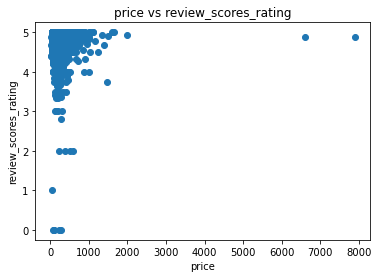

In [131]:
scatter(df1, "price", "review_scores_rating")

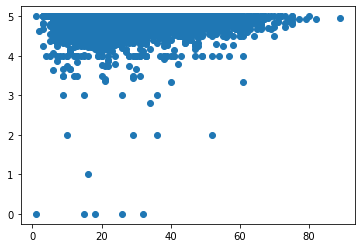

In [129]:
plt.scatter(df1["num_amenities"], df1["review_scores_rating"])

In [139]:
import seaborn as sns
type(df["price"])

str

/Users/kevinyan/opt/miniconda3/envs/cse217a/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Violin Plot of Nightly Prices')

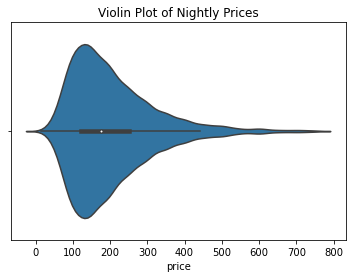

In [145]:

q = df1["price"].quantile(0.99)

sns.violinplot(df1["price"].loc[df1["price"] < q])
plt.title("Violin Plot of Nightly Prices")

In [148]:
def prices_violin_plot(df):
    sns.violinplot(df["price"].loc[df["price"] < df["price"].quantile(0.99)])
    plt.xlabel("price per night")
    plt.title("Violin Plot of Nightly Prices")
    plt.show()

/Users/kevinyan/opt/miniconda3/envs/cse217a/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


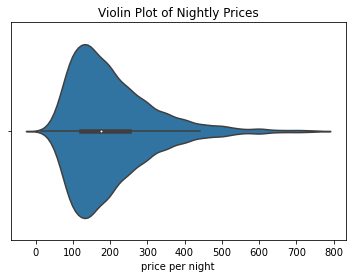

In [149]:
prices_violin_plot(df1)

In [152]:
from sklearn.linear_model import LinearRegression

In [167]:
def predict_price(df, feature, feature_val):
    model = LinearRegression().fit(df[feature].values.reshape(-1,1), df["price"])
    return model.predict([[feature_val]])[0]


In [165]:
model = LinearRegression().fit(df1["num_amenities"].values.reshape(-1,1), df1["price"])
model.predict([[5]])[0]

154.77803698968157

In [170]:
predict_price(df1, "num_amenities", 40)

237.2348002332651